# Anti-Spam - Preliminary data processing

In [ ]:
import nltk
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
import re

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## _SMS Spam Collection_

In [ ]:
df = pd.read_csv("drive/MyDrive/NLP_datasets/SMSspamcollection/SMSSpamCollection",sep='\t',names=['cat','txt'])
df.head()

,cat,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


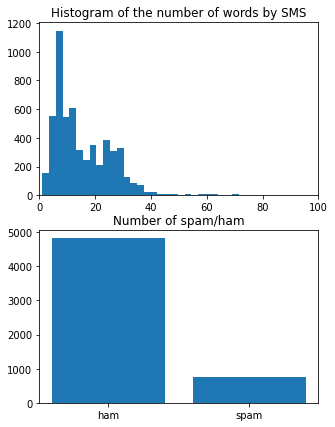

In [ ]:
number_of_words = df['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 70)
plt.xlim([0,100])
plt.title("Histogram of the number of words by SMS")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Enron

In [ ]:
df = pd.DataFrame(columns=['cat', 'sub', 'txt'])
#df = df.append({'cat':'test_cat', 'sub':'test_sub', 'txt':'test_txt'}, ignore_index=True)

# Insert ham mails
dir_enron_ham = 'drive/MyDrive/NLP_datasets/enron/ham'
for filename in os.listdir(dir_enron_ham):
  with open(os.path.join(dir_enron_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
    list_text = f.readlines()
    sub = list_text[0][9:] # Parse the subject line
    txt = ' '.join(list_text[1:])
    df = df.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

# Insert spam mails
dir_enron_spam = 'drive/MyDrive/NLP_datasets/enron/spam'
for filename in os.listdir(dir_enron_spam):
  with open(os.path.join(dir_enron_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
    try:
      list_text = f.readlines()
    except:
      print(filename)
    sub = list_text[0][9:] # Parse the subject line
    txt = ' '.join(list_text[1:])
    df = df.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

df.head()

,cat,sub,txt
0,ham,updated q & as for enron employees\n,updated questions and answers for enron employ...
1,ham,http : / / hrweb . enron . com / benefits / fo...,
2,ham,united way 2001 - building houston ' s future\n,"building houston ' s future , enron ' s 2001 u..."
3,ham,fw : tw rofr\n,"fyi , kim .\n - - - - - original message - - -..."
4,ham,br / tw window rock meeting scheduled for dec ...,"michelle ,\n we are looking forward to the pla..."


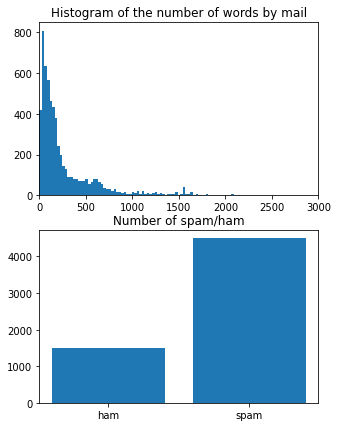

In [ ]:
number_of_words = df['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 200)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Spam Assassin

In [ ]:
df = pd.DataFrame(columns=['cat', 'sub', 'txt'])
re_sub = re.compile('[Ss]ubject ?:')

# Insert ham mails

dirs_ham = ['easy_ham', 'easy_ham_2']
for dir_ext in dirs_ham:
  dir_spamassassin_ham = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_ham):
    with open(os.path.join(dir_spamassassin_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
      sub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df = df.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

In [ ]:
# Insert spam mails
dirs_spam = ['spam', 'spam_2']
for dir_ext in dirs_spam:
  dir_spamassassin_spam = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_spam):
    with open(os.path.join(dir_spamassassin_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
      ub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df = df.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

df.head()

,cat,sub,txt
0,ham,[ILUG] Sun Solaris..,Can someone explain what type of operating sys...
1,ham,whoa,This just blew my mind: http://www.earthviewe...
2,ham,British dossier on Iraqi weapons released,"URL: http://www.newsisfree.com/click/-2,820280..."
3,ham,Re: [SAdev] Integrating SA with Mail::CheckUs...,"On Thu, 22 Aug 2002 the voices made Justin Mas..."
4,ham,[use Perl] Stories for 2002-10-03,use Perl Daily Newsletter In this issue: ...


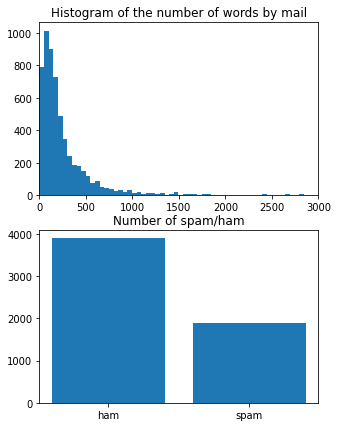

In [ ]:
number_of_words = df['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 300)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()